In [23]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '221b8fca-ef72-4c48-9966-2fb0115f8162',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2025-04-09T17:02:10.627Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 10361}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12021, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
type(data)

dict

In [60]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [25]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [42]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12021,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.984893e+07,1.984893e+07,False,NaN,1,NaN,NaN,NaN,2025-04-09T17:00:00.000Z,78200.583154,6.138896e+10,25.3851,1.306385,1.086228,-10.190505,-1.035647,-18.711491,-17.023980,1.552198e+12,62.7149,1.642212e+12,NaN,2025-04-09T17:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:02:15.182048
1,1027,Ethereum,ETH,ethereum,10115,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206785e+08,1.206785e+08,True,NaN,2,NaN,NaN,NaN,2025-04-09T17:01:00.000Z,1503.466559,3.042848e+10,52.5612,1.404275,1.448475,-21.025282,-24.889438,-42.532316,-54.400756,1.814361e+11,7.3307,1.814361e+11,NaN,2025-04-09T17:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:02:15.182048
2,825,Tether USDt,USDT,tether,123321,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.440144e+11,1.478590e+11,True,NaN,3,NaN,NaN,NaN,2025-04-09T17:00:00.000Z,0.999253,1.039277e+11,29.0034,-0.016900,-0.000895,-0.079621,-0.024121,-0.066348,-0.066460,1.439068e+11,5.8144,1.477486e+11,NaN,2025-04-09T17:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-09 20:02:15.182048
3,52,XRP,XRP,xrp,1581,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.827497e+10,9.998628e+10,False,NaN,4,NaN,NaN,NaN,2025-04-09T17:01:00.000Z,1.863949,7.232898e+09,14.7476,1.941815,0.094905,-13.814183,-10.852092,-22.665744,-19.662490,1.086216e+11,4.3887,1.863949e+11,NaN,2025-04-09T17:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:02:15.182048
4,1839,BNB,BNB,bnb,2457,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424709e+08,1.424709e+08,False,NaN,5,NaN,NaN,NaN,2025-04-09T17:01:00.000Z,566.551352,1.770532e+09,3.2384,0.983161,2.690849,-6.597266,3.655884,-7.566947,-18.564554,8.071709e+10,3.2533,8.071709e+10,NaN,2025-04-09T17:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:02:15.182048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3871,AB,AB,newton,30,2019-04-17T00:00:00.000Z,"[mineable, marketplace, enterprise-solutions]",9.882366e+10,5.278981e+10,9.882366e+10,False,NaN,96,5.278981e+10,5.052403e+08,NaN,2025-04-09T17:01:00.000Z,0.009571,6.603097e+07,-21.9506,-0.052589,-10.168315,-14.954315,-26.974086,49.247149,2150.963571,5.052403e+08,0.0204,9.458208e+08,NaN,2025-04-09T17:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:02:15.182048
96,2563,TrueUSD,TUSD,trueusd,566,2018-03-06T00:00:00.000Z,"[store-of-value, stablecoin, asset-backed-stab...",NaN,4.955161e+08,4.955161e+08,False,NaN,97,NaN,NaN,NaN,2025-04-09T17:01:00.000Z,0.998192,5.253270e+07,0.5214,0.026392,0.006644,-0.097098,0.069412,0.131553,-0.160896,4.946201e+08,0.0200,4.946201e+08,NaN,2025-04-09T17:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0x0000000000085d4780B73119b644AE5ecd22b376,2025-04-09 20:02:15.182048
97,9481,Pendle,PENDLE,pendle,454,2021-04-29T00:00:00.000Z,"[defi, ethereum-ecosystem, olympus-pro-ecosyst...",NaN,1.615256e+08,2.815274e+08,False,NaN,98,NaN,NaN,0.161846,2025-04-09T17:00:00.000Z,3.062240,1.687473e+08,35.3279,1.952330,8.368627,-4.416899,53.659567,1.943811,-25.837240,4.946302e+08,0.0200,8.621047e+08,3.056174e+09,2025-04-0

In [64]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '221b8fca-ef72-4c48-9966-2fb0115f8162',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df,df2])

    if not os.path.isfile(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv'):
        df.to_csv(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv', mode='a', header=False)

In [140]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully.')
    sleep(60)
exit()

{'status': {'timestamp': '2025-04-09T20:31:21.021Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': None, 'total_count': 10360}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12021, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [142]:
df3 = pd.read_csv(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12021,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19848934.00000,19848934.00000,False,NaN,1,NaN,NaN,NaN,2025-04-09T17:34:00.000Z,81158.44836,67087012070.28488,38.46900,4.36887,5.94343,-6.29991,3.08670,-15.67205,-13.30012,1610908684944.07202,62.88520,1704327415458.45996,NaN,2025-04-09T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
1,1,1027,Ethereum,ETH,ethereum,10115,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120678504.32572,120678504.32572,True,NaN,2,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,1590.61518,32478878361.15899,61.12790,5.80495,9.02686,-15.89520,-17.91930,-39.39597,-51.39046,191953061372.86990,7.49330,191953061372.87000,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
2,2,825,Tether USDt,USDT,tether,123322,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144014397535.68182,147858996006.40207,True,NaN,3,NaN,NaN,NaN,2025-04-09T17:34:00.000Z,0.99911,113017962184.86237,41.55060,-0.00426,-0.03009,-0.07160,-0.05702,-0.07769,-0.08320,143886457249.58340,5.61690,147727640235.20999,NaN,2025-04-09T17:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-09 20:37:06.110774
3,3,52,XRP,XRP,xrp,1581,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58274974538.00000,99986277500.00000,False,NaN,4,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,2.01731,8034249108.35572,26.92380,9.71976,11.16266,-5.85482,-3.50191,-16.35829,-13.13018,117558502973.96512,4.58910,201730680975.76999,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
4,4,1839,BNB,BNB,bnb,2458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142470909.61000,142470909.61000,False,NaN,5,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,577.97868,1850971005.15817,9.03380,2.36499,5.33032,-4.28490,6.97610,-5.60910,-16.62645,82345148716.32526,3.19640,82345148716.33000,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
5,5,3408,USDC,USDC,usd-coin,26962,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,59956367069.11213,59956367069.11213,False,NaN,6,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,1.00002,19559687790.62039,32.11980,0.00725,0.01223,0.03274,-0.02880,0.00168,-0.01432,59957270284.99326,2.32740,59957270284.99000,NaN,2025-04-09T17:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-09 20:37:06.110774
6,6,5426,Solana,SOL,solana,888,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,515592320.47851,598133525.05087,True,NaN,7,NaN,NaN,NaN,2025-04-09T17:34:00.000Z,115.55095,6038919668.70971,17.76550,7.88814,11.15935,-10.99373,-2.19289,-40.97832,-39.19928,59577180099.46112,2.32570,69114894326.61000,NaN,2025-04-09T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
7,7,74,Dogecoin,DOGE,dogecoin,1199,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148783356383.70520,148783356383.70520,True,NaN,8,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,0.15665,1941412597.07374,0.19080,6.30292,9.85484,-8.84911,-2.58739,-37.94372,-51.92583,23306950045.41050,0.90470,23306950045.41000,NaN,2025-0

In [72]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [74]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12021,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19848934.00000,19848934.00000,False,NaN,1,NaN,NaN,NaN,2025-04-09T17:34:00.000Z,81158.44836,67087012070.28488,38.46900,4.36887,5.94343,-6.29991,3.08670,-15.67205,-13.30012,1610908684944.07202,62.88520,1704327415458.45996,NaN,2025-04-09T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
1,1,1027,Ethereum,ETH,ethereum,10115,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120678504.32572,120678504.32572,True,NaN,2,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,1590.61518,32478878361.15899,61.12790,5.80495,9.02686,-15.89520,-17.91930,-39.39597,-51.39046,191953061372.86990,7.49330,191953061372.87000,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
2,2,825,Tether USDt,USDT,tether,123322,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144014397535.68182,147858996006.40207,True,NaN,3,NaN,NaN,NaN,2025-04-09T17:34:00.000Z,0.99911,113017962184.86237,41.55060,-0.00426,-0.03009,-0.07160,-0.05702,-0.07769,-0.08320,143886457249.58340,5.61690,147727640235.20999,NaN,2025-04-09T17:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-09 20:37:06.110774
3,3,52,XRP,XRP,xrp,1581,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58274974538.00000,99986277500.00000,False,NaN,4,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,2.01731,8034249108.35572,26.92380,9.71976,11.16266,-5.85482,-3.50191,-16.35829,-13.13018,117558502973.96512,4.58910,201730680975.76999,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
4,4,1839,BNB,BNB,bnb,2458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142470909.61000,142470909.61000,False,NaN,5,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,577.97868,1850971005.15817,9.03380,2.36499,5.33032,-4.28490,6.97610,-5.60910,-16.62645,82345148716.32526,3.19640,82345148716.33000,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
5,5,3408,USDC,USDC,usd-coin,26962,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,59956367069.11213,59956367069.11213,False,NaN,6,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,1.00002,19559687790.62039,32.11980,0.00725,0.01223,0.03274,-0.02880,0.00168,-0.01432,59957270284.99326,2.32740,59957270284.99000,NaN,2025-04-09T17:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-04-09 20:37:06.110774
6,6,5426,Solana,SOL,solana,888,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,515592320.47851,598133525.05087,True,NaN,7,NaN,NaN,NaN,2025-04-09T17:34:00.000Z,115.55095,6038919668.70971,17.76550,7.88814,11.15935,-10.99373,-2.19289,-40.97832,-39.19928,59577180099.46112,2.32570,69114894326.61000,NaN,2025-04-09T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
7,7,74,Dogecoin,DOGE,dogecoin,1199,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,148783356383.70520,148783356383.70520,True,NaN,8,NaN,NaN,NaN,2025-04-09T17:35:00.000Z,0.15665,1941412597.07374,0.19080,6.30292,9.85484,-8.84911,-2.58739,-37.94372,-51.92583,23306950045.41050,0.90470,23306950045.41000,NaN,2025-0

In [144]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.60806,6.74856,-5.07316,3.62258,-15.16457,-11.31170
Ethereum,2.70587,11.06686,-14.04939,-14.12825,-38.22165,-49.36485
Tether USDt,0.00855,0.02783,-0.04834,0.00619,-0.05260,-0.04747
XRP,3.95825,11.89003,-5.08322,-2.34247,-16.09483,-11.24483
BNB,0.80789,5.10561,-3.97715,7.75223,-7.14977,-15.25611
USDC,0.00117,-0.00828,0.01725,-0.00268,-0.00637,-0.00656
Solana,3.04721,12.97510,-9.67398,-1.14223,-40.29183,-36.77510
Dogecoin,2.59656,11.44529,-7.78431,0.21036,-36.97854,-50.27478
TRON,1.16116,2.37110,-0.71373,2.32007,2.32677,-1.37010


In [146]:
df5 = df4.stack()
df5

name                                                               
Bitcoin                                quote.USD.percent_change_1h       1.60806
                                       quote.USD.percent_change_24h      6.74856
                                       quote.USD.percent_change_7d      -5.07316
                                       quote.USD.percent_change_30d      3.62258
                                       quote.USD.percent_change_60d    -15.16457
                                       quote.USD.percent_change_90d    -11.31170
Ethereum                               quote.USD.percent_change_1h       2.70587
                                       quote.USD.percent_change_24h     11.06686
                                       quote.USD.percent_change_7d     -14.04939
                                       quote.USD.percent_change_30d    -14.12825
                                       quote.USD.percent_change_60d    -38.22165
                                       qu

In [148]:
df6 = df5.to_frame(name='values')
df6

values
name                                                                         
Bitcoin                               quote.USD.percent_change_1h     1.60806
                                      quote.USD.percent_change_24h    6.74856
                                      quote.USD.percent_change_7d    -5.07316
                                      quote.USD.percent_change_30d    3.62258
                                      quote.USD.percent_change_60d  -15.16457
                                      quote.USD.percent_change_90d  -11.31170
Ethereum                              quote.USD.percent_change_1h     2.70587
                                      quote.USD.percent_change_24h   11.06686
                                      quote.USD.percent_change_7d   -14.04939
                                      quote.USD.percent_change_30d  -14.12825
                                      quote.USD.percent_change_60d  -38.22165
                                      quote.USD.percent_change_90d  -49.36485
Tether USDt                           quote.USD.percent_change_1h     0.00855
                                      quote.USD.percent_change_24h    0.02783
                                      quote.USD.percent_change_7d    -0.04834
                                      quote.USD.percent_change_30d    0.00619
                                      quote.USD.percent_change_60d   -0.05260
                                      quote.USD.percent_change_90d   -0.04747
XRP                                   quote.USD.percent_change_1h     3.95825
                                      quote.USD.percent_change_24h   11.89003
                                      quote.USD.percent_change_7d    -5.08322
                                      quote.USD.percent_change_30d   -2.34247
                                      quote.USD.percent_change_60d  -16.09483
                                      quote.USD.percent_change_90d  -11.24483
BNB                                   quote.USD.percent_change_1h     0.80789
                                      quote.USD.percent_change_24h    5.10561
                                      quote.USD.percent_change_7d    -3.97715
                                      quote.USD.percent_change_30d    7.75223
                                      quote.USD.percent_change_60d   -7.14977
                                      quote.USD.percent_change_90d  -15.25611
USDC                                  quote.USD.percent_change_1h     0.00117
                                      quote.USD.percent_change_24h   -0.00828
                                      quote.USD.percent_change_7d     0.01725
                                      quote.USD.percent_change_30d   -0.00268
                                      quote.USD.percent_change_60d   -0.00637
                                      quote.USD.percent_change_90d   -0.00656
Solana                                quote.USD.percent_change_1h     3.04721
                                      quote.USD.percent_change_24h   12.97510
                                      quote.USD.percent_change_7d    -9.67398
                                      quote.USD.percent_change_30d   -1.14223
                                      quote.USD.percent_change_60d  -40.29183
                                      quote.USD.percent_change_90d  -36.77510
Dogecoin                              quote.USD.percent_change_1h     2.59656
                                      quote.USD.percent_change_24h   11.44529
                                      quote.USD.percent_change_7d    -7.78431
                                      quote.USD.percent_change_30d    0.21036
                                      quote.USD.percent_change_60d  -36.97854
                                      quote.USD.percent_change_90d  -50.27478
TRON                                  quote.USD.percent_change_1h     1.16116
                                      quote.USD.percent_change_24h    2.37110
               

In [150]:
df6.count()

values    606
dtype: int64

In [154]:
index = pd.Index(range(606))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.60806
1,Bitcoin,quote.USD.percent_change_24h,6.74856
2,Bitcoin,quote.USD.percent_change_7d,-5.07316
3,Bitcoin,quote.USD.percent_change_30d,3.62258
4,Bitcoin,quote.USD.percent_change_60d,-15.16457
5,Bitcoin,quote.USD.percent_change_90d,-11.31170
6,Ethereum,quote.USD.percent_change_1h,2.70587
7,Ethereum,quote.USD.percent_change_24h,11.06686
8,Ethereum,quote.USD.percent_change_7d,-14.04939
9,Ethereum,quote.USD.percent_change_30d,-14.12825


In [156]:
df8 = df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.60806
1,Bitcoin,quote.USD.percent_change_24h,6.74856
2,Bitcoin,quote.USD.percent_change_7d,-5.07316
3,Bitcoin,quote.USD.percent_change_30d,3.62258
4,Bitcoin,quote.USD.percent_change_60d,-15.16457
5,Bitcoin,quote.USD.percent_change_90d,-11.31170
6,Ethereum,quote.USD.percent_change_1h,2.70587
7,Ethereum,quote.USD.percent_change_24h,11.06686
8,Ethereum,quote.USD.percent_change_7d,-14.04939
9,Ethereum,quote.USD.percent_change_30d,-14.12825


In [158]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

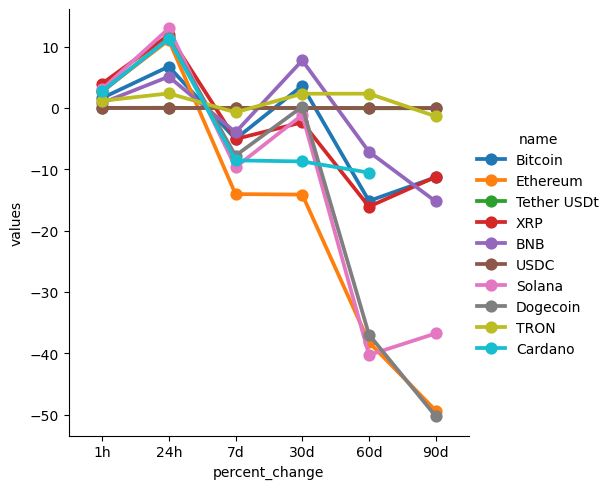

In [160]:
sns.catplot(x='percent_change',y='values', hue='name',data=df8[0:59],kind='point')

In [162]:
df10 = df3[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,81158.44836,2025-04-09 20:37:06.110774
100,Bitcoin,81468.88467,2025-04-09 20:38:07.121031
200,Bitcoin,82106.08001,2025-04-09 23:31:20.869770
300,Bitcoin,82079.25196,2025-04-09 23:32:21.850351
400,Bitcoin,82035.84636,2025-04-09 23:33:22.981531


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

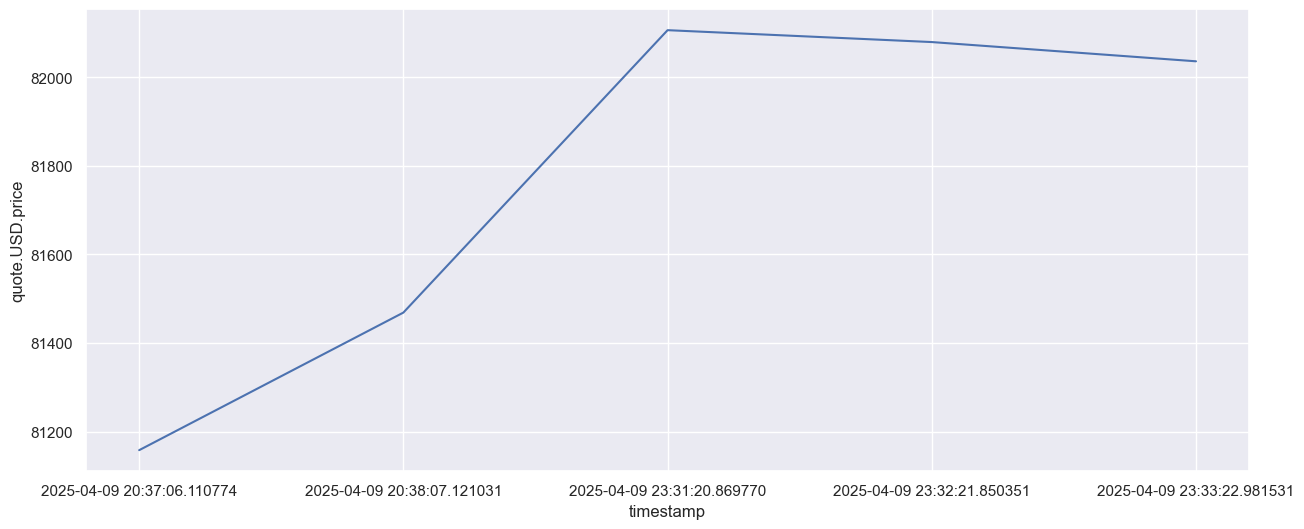

In [178]:
sns.set_theme(style='darkgrid')
sns.set_theme(rc={'figure.figsize':(15,6)})
sns.lineplot(x='timestamp',y='quote.USD.price',data = df10)